# Unit 5 - Financial Planning

In [22]:
# Initial imports
import os
import requests
import pandas as pd
import datetime as dt
import yfinance as yf
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from MCForecastTools import MCSimulation
from warnings import simplefilter

%matplotlib inline

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [2]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [3]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [4]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url)
btc_data = response_btc_data.json()

# Fetch current ETH price
response_eth_data = requests.get(eth_url)
eth_data = response_eth_data.json()

# Compute current value of my crpto
# Assign CAD price
btc_cad_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
eth_cad_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Calculate crypto currency value
my_btc_value = btc_cad_price * my_btc
my_eth_value = eth_cad_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27041.45
The current value of your 5.3 ETH is $8658.85


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [5]:
# Set current amount of shares
my_agg = 200
my_spy = 50

### Please note, due to geographical difficulty (Canada) we are not able to register the Alpaca API. Therefore, we used Yahoo Finance library to fetch data.

In [6]:
# Set the tickers
agg_ticker = "AGG"
spy_ticker = "SPY"

# Get current closing prices for SPY and AGG
Start = dt.datetime(2021, 12, 20)
End = dt.datetime(2022, 12, 19)

# This function fetch ticker data and return hisorical ticker data as dataframe
def get_ticker_data(ticker, start, end):
    ticker_df = pd.DataFrame(yf.Ticker(ticker).history(start=Start,end=End))
    return ticker_df

# Fetch ticker data and assign to dataframe
agg_ticker_df = get_ticker_data(agg_ticker, Start, End)

spy_ticker_df = get_ticker_data(spy_ticker, Start, End)

# Reorganize the DataFrame
# Rename column name
agg_ticker_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
spy_ticker_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

# Concatenate the ticker DataFrames
crypto_df = pd.concat([agg_ticker_df,spy_ticker_df], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
crypto_df.head()

AGG                                      \
                                 open        high         low       close   
Date                                                                        
2021-12-20 00:00:00-05:00  111.985240  112.024338  111.740880  111.750656   
2021-12-21 00:00:00-05:00  111.496503  111.740863  111.398761  111.662666   
2021-12-22 00:00:00-05:00  111.750637  111.770183  111.594244  111.760406   
2021-12-23 00:00:00-05:00  111.711531  111.731077  111.496494  111.623558   
2021-12-27 00:00:00-05:00  111.574702  111.721319  111.555149  111.682220   

                                                                   SPY  \
                             volume Dividends Stock Splits        open   
Date                                                                     
2021-12-20 00:00:00-05:00   7382600       0.0            0  447.224565   
2021-12-21 00:00:00-05:00  12970200       0.0            0  451.288631   
2021-12-22 00:00:00-05:00   6171700       0.0            0  455.401864   
2021-12-23 00:00:00-05:00   5506700       0.0            0  461.266717   
2021-12-27 00:00:00-05:00   5436800       0.0            0  464.523872   

                                                                          \
                                 high         low       close     volume   
Date                                                                       
2021-12-20 00:00:00-05:00  448.129861  443.937890  447.716583  107134800   
2021-12-21 00:00:00-05:00  455.815202  449.025361  455.667603   69806300   
2021-12-22 00:00:00-05:00  460.341712  455.195195  460.223633   58890200   
2021-12-23 00:00:00-05:00  464.651802  461.158487  463.087189   56439700   
2021-12-27 00:00:00-05:00  469.690059  464.474682  469.640869   56808600   

                                                  
                          Dividends Stock Splits  
Date                                              
2021-12-20 00:00:00-05:00       0.0            0  
2021-12-21 00:00:00-05:00       0.0            0  
2021-12-22 00:00:00-05:00       0.0            0  
2021-12-23 00:00:00-05:00       0.0            0  
2021-12-27 00:00:00-05:00       0.0            0

In [7]:
# Pick AGG and SPY close prices
agg_close_price = crypto_df.iloc[0,3]
spy_close_price = crypto_df.iloc[0,10]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${round(agg_close_price,2)}")
print(f"Current SPY closing price: ${round(spy_close_price,2)}")

Current AGG closing price: $111.75
Current SPY closing price: $447.72


In [8]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22385.83
The current value of your 200 AGG shares is $22350.13


### Savings Health Analysis

In [9]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_cryptos = my_btc_value + my_eth_value

my_stocks = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame([my_cryptos,my_stocks], columns=["amount"])

# Set index
index = pd.Index(["crypto","shares"])
df_savings = df_savings.set_index(index)

# Display savings DataFrame
display(df_savings)

,amount
crypto,35700.299992
shares,44735.960388


<AxesSubplot:title={'center':'Saving Portfolio Composition'}, ylabel='amount'>

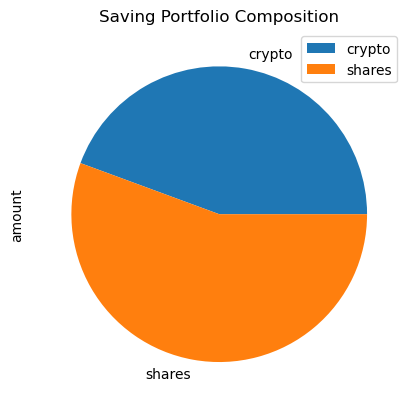

In [10]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Saving Portfolio Composition")

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
current_savings = df_savings.loc["crypto","amount"] + df_savings.loc["shares","amount"]

# Validate saving health
if current_savings > emergency_fund:
    print(f"Congraturations! your current savings are ${round(current_savings, 2)}, it is ${round((current_savings - emergency_fund),2)} above the emergency fund")
elif current_savings == emergency_fund:
    print(f"Congraturations! your current savings are ${round(current_savings, 2)}, which is exactly the same as the emergency fund")
else:
    print(f"Currently, you are ${round((emergency_fund - current_savings),2)} away from the emergency fund, keep on saving!!")

Congraturations! your current savings are $80436.26, it is $44436.26 above the emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

###  Please note, due to geographical difficulty (Canada) we are not able to register the Alpaca API. Therefore, we used Yahoo Finance library to fetch data.

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# Get current closing prices for SPY and AGG
# Set start and end dates of five years back from today.
Start = dt.datetime(2017, 12, 20)
End = dt.datetime(2022, 12, 19)

# This function fetch ticker data and return hisorical ticker data as dataframe
def get_ticker_data(ticker, start, end):
    ticker_df = pd.DataFrame(yf.Ticker(ticker).history(start=Start,end=End))
    return ticker_df

# Fetch ticker data and assign to dataframe
agg_ticker_history_df = get_ticker_data(agg_ticker, Start, End)

spy_ticker_history_df = get_ticker_data(spy_ticker, Start, End)

# Reorganize the DataFrame
# Rename column name
agg_ticker_history_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
spy_ticker_history_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

# Drop unnecessary columns
agg_ticker_history_df = agg_ticker_history_df.drop(axis=1, columns=["Dividends", "Stock Splits"])
spy_ticker_history_df = spy_ticker_history_df.drop(axis=1, columns=["Dividends", "Stock Splits"])

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_ticker_history_df,spy_ticker_history_df], axis=1, keys=["AGG","SPY"])

df_stock_data.head()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2017-12-20 00:00:00-05:00  96.503385  96.618743  96.467888  96.512260   
2017-12-21 00:00:00-05:00  96.544192  96.641837  96.517562  96.597450   
2017-12-22 00:00:00-05:00  96.597467  96.659604  96.588588  96.641853   
2017-12-26 00:00:00-05:00  96.677338  96.766105  96.641830  96.721718   
2017-12-27 00:00:00-05:00  96.774965  97.050151  96.774965  97.023521   

                                           SPY                          \
                            volume        open        high         low   
Date                                                                     
2017-12-20 00:00:00-05:00  4002500  246.307589  246.362675  244.856951   
2017-12-21 00:00:00-05:00  2374500  245.820962  246.417771  245.416981   
2017-12-22 00:00:00-05:00  3292800  245.692400  245.729134  245.049696   
2017-12-26 00:00:00-05:00  1873400  245.187457  245.545543  245.040581   
2017-12-27 00:00:00-05:00  2046900  245.490480  245.811832  245.150775   

                                                 
                                close    volume  
Date                                             
2017-12-20 00:00:00-05:00  245.169113  76751500  
2017-12-21 00:00:00-05:00  245.674057  67032300  
2017-12-22 00:00:00-05:00  245.609772  78720900  
2017-12-26 00:00:00-05:00  245.316010  45244400  
2017-12-27 00:00:00-05:00  245.435394  57751000

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist_thirty = MCSimulation(portfolio_data=df_stock_data, weights = [.4,.6],num_simulation = 500, num_trading_days = 252*30)

In [21]:
# Printing the simulation input data
MC_dist_thirty.portfolio_data.head()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2017-12-20 00:00:00-05:00  96.503385  96.618743  96.467888  96.512260   
2017-12-21 00:00:00-05:00  96.544192  96.641837  96.517562  96.597450   
2017-12-22 00:00:00-05:00  96.597467  96.659604  96.588588  96.641853   
2017-12-26 00:00:00-05:00  96.677338  96.766105  96.641830  96.721718   
2017-12-27 00:00:00-05:00  96.774965  97.050151  96.774965  97.023521   

                                                        SPY              \
                            volume daily_return        open        high   
Date                                                                      
2017-12-20 00:00:00-05:00  4002500          NaN  246.307589  246.362675   
2017-12-21 00:00:00-05:00  2374500     0.000883  245.820962  246.417771   
2017-12-22 00:00:00-05:00  3292800     0.000460  245.692400  245.729134   
2017-12-26 00:00:00-05:00  1873400     0.000826  245.187457  245.545543   
2017-12-27 00:00:00-05:00  2046900     0.003120  245.490480  245.811832   

                                                                          
                                  low       close    volume daily_return  
Date                                                                      
2017-12-20 00:00:00-05:00  244.856951  245.169113  76751500          NaN  
2017-12-21 00:00:00-05:00  245.416981  245.674057  67032300     0.002060  
2017-12-22 00:00:00-05:00  245.049696  245.609772  78720900    -0.000262  
2017-12-26 00:00:00-05:00  245.040581  245.316010  45244400    -0.001196  
2017-12-27 00:00:00-05:00  245.150775  245.435394  57751000     0.000487

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
simplefilter(action="ignore", category=pd.errors.PerformanceWarning) # This function ignores warning message

MC_dist_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994081,0.989761,1.005823,0.997711,1.004403,1.001106,1.016263,1.006121,1.003901,0.994376,...,1.013983,0.996837,0.994714,1.007045,1.020098,1.016245,0.995363,0.999012,0.987295,1.011615
2,0.992283,0.988118,1.002801,1.008108,1.004179,1.003646,1.007973,1.023924,1.008590,0.989403,...,1.026127,1.003091,0.977866,0.991672,1.028280,1.019265,0.992081,1.005242,0.990269,1.015247
3,1.002025,0.979047,1.001094,1.019912,1.005967,1.011477,1.010028,1.038671,1.019578,0.999152,...,1.011891,1.014442,0.984180,0.981179,1.024693,1.035994,1.000012,0.981899,0.989711,1.028722
4,0.997932,0.967471,1.003177,1.021383,0.996928,1.006942,1.017714,1.033469,1.018145,1.001327,...,1.019730,1.007360,0.984699,0.983318,1.014730,1.038445,1.014355,0.993219,0.987168,1.011384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.692365,10.496381,5.882170,6.222099,5.076193,2.244186,3.999286,9.454664,4.826153,12.763116,...,3.863795,2.564632,4.640256,5.040936,23.235765,9.623795,2.498522,2.754323,7.210600,5.573368
7557,3.644752,10.467152,5.913220,6.240354,5.088625,2.257956,4.065280,9.448961,4.812008,12.942299,...,3.843365,2.570044,4.623011,5.022081,23.247351,9.717825,2.519906,2.758011,7.249527,5.569312
7558,3.652906,10.531225,5.964185,6.210235,5.117840,2.285246,4.088470,9.521370,4.849631,12.882922,...,3.877398,2.565295,4.676998,5.014630,23.159677,9.747180,2.528655,2.786309,7.297859,5.597015
7559,3.654361,10.625919,6.035184,6.249156,5.119311,2.324471,4.107120,9.568642,4.923749,12.839898,...,3.884361,2.533579,4.745311,5.053799,23.045772,9.771296,2.519011,2.781978,7.325298,5.580654


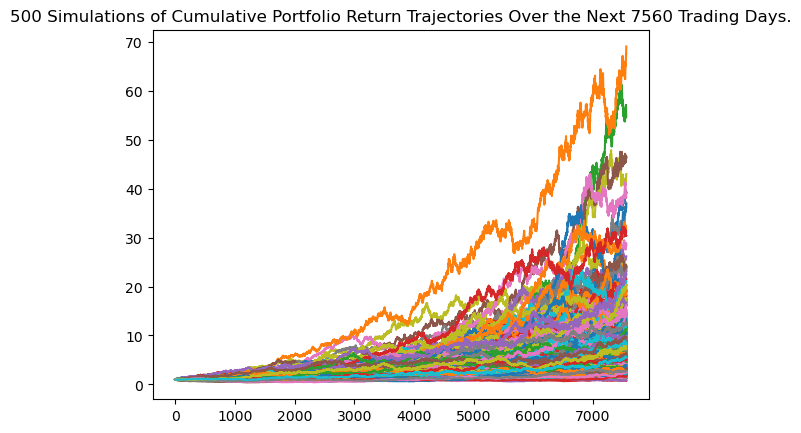

In [24]:
# Plot simulation outcomes
line_plot = MC_dist_thirty.plot_simulation()

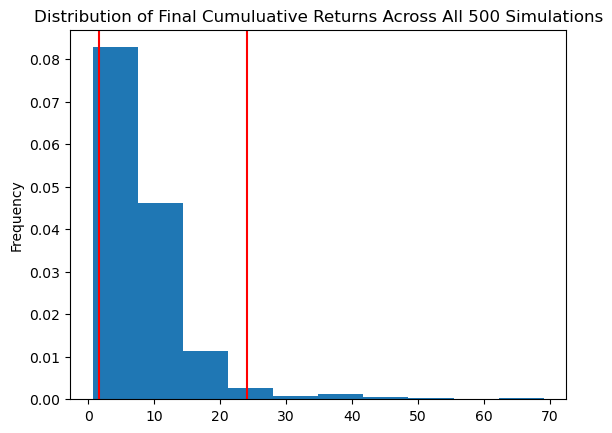

In [25]:
# Plot probability distribution and confidence intervals
dist_plot=MC_dist_thirty.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stat = MC_dist_thirty.summarize_cumulative_return()

# Print summary statistics
print(summary_stat)

count           500.000000
mean              8.470573
std               7.039845
min               0.706891
25%               4.179525
50%               6.750470
75%              10.436641
max              69.100240
95% CI Lower      1.717401
95% CI Upper     24.044373
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stat[8]*initial_investment,2)
ci_upper = round(summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $34348.02 and $480887.47


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stat[8]*initial_investment,2)
ci_upper = round(summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $51522.03 and $721331.2


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Case 1: Increase stock ratio from 60% to 80%, and increase initial_investment to $60,000
MC_dist_portfolio_five = MCSimulation(portfolio_data=df_stock_data, weights = [.2,.8],num_simulation = 500, num_trading_days = 252*5)

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_portfolio_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001334,1.001493,1.004972,1.004758,1.009961,0.984025,0.993794,1.001656,1.022304,0.992962,...,1.005310,0.992409,1.007796,0.978411,1.004501,0.992289,1.004130,1.006850,0.972965,1.003651
2,0.987877,1.003758,0.990531,1.011626,1.006497,1.001483,0.997513,1.016909,1.034689,0.997583,...,1.009609,0.985141,1.002156,0.979240,1.000651,1.017332,1.006234,0.985237,0.978679,1.004275
3,0.989440,0.996398,0.990891,1.005768,1.003607,0.999157,1.006961,1.016658,1.028307,1.002175,...,1.004685,0.983323,1.024300,0.972188,1.001998,1.002248,0.986665,1.014191,0.959396,1.011676
4,0.990919,0.994608,0.999648,0.998368,1.001471,0.998269,0.990202,1.023574,1.043123,1.006746,...,1.006914,0.978337,1.023808,0.982305,1.011940,1.001428,0.976947,0.999187,0.957743,1.024764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.682026,1.644318,1.414817,1.361280,2.140002,1.529821,1.934263,1.208962,1.948763,1.586133,...,1.121050,3.040442,1.492895,1.821774,1.557958,1.849478,1.057722,2.582528,0.973521,1.985423
1257,1.689695,1.653871,1.422586,1.383263,2.111877,1.517992,1.915104,1.219041,1.911469,1.578457,...,1.136870,2.997024,1.482219,1.879617,1.538587,1.850756,1.049944,2.587274,0.957898,1.961333
1258,1.707862,1.641653,1.419072,1.389932,2.123261,1.484102,1.882596,1.210492,1.909707,1.560826,...,1.119888,3.031971,1.468096,1.872967,1.531112,1.866801,1.033115,2.593432,0.949495,1.974414
1259,1.704059,1.636814,1.427276,1.410128,2.138073,1.483909,1.921335,1.193327,1.942327,1.539525,...,1.098327,3.013174,1.478961,1.845786,1.538679,1.824696,1.037302,2.617835,0.950989,2.006780


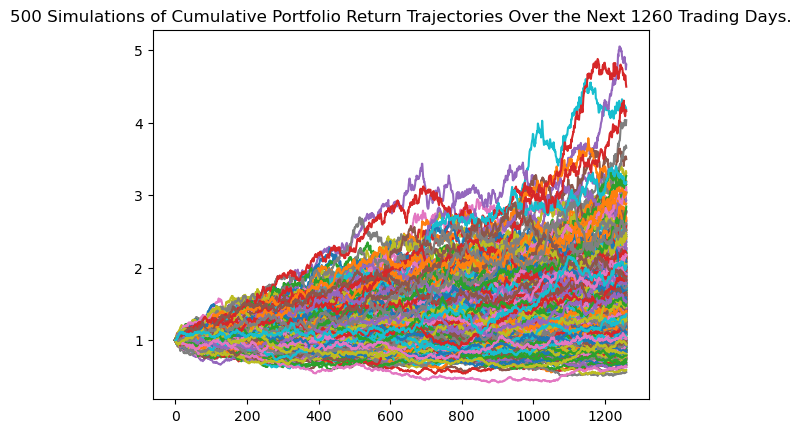

In [31]:
# Plot simulation outcomes
line_plot = MC_dist_portfolio_five.plot_simulation()

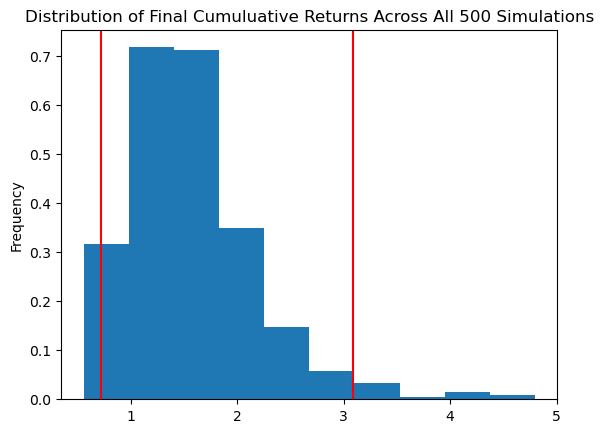

In [32]:
# Plot probability distribution and confidence intervals
dist_plot=MC_dist_portfolio_five.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_portfolio_five_stat = MC_dist_portfolio_five.summarize_cumulative_return()

# Print summary statistics
print(summary_portfolio_five_stat)

count           500.000000
mean              1.587731
std               0.609222
min               0.561079
25%               1.189376
50%               1.489608
75%               1.856635
max               4.796606
95% CI Lower      0.725690
95% CI Upper      3.087635
Name: 1260, dtype: float64


In [34]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_portfolio_five_stat[8]*initial_investment,2)
ci_upper_five = round(summary_portfolio_five_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $43541.38 and $185258.13


### Ten Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Case 1: Increase stock ratio from 60% to 80%, and increase initial_investment to $60,000
MC_dist_portfolio_ten = MCSimulation(portfolio_data=df_stock_data, weights = [.2,.8],num_simulation = 500, num_trading_days = 252*10)

In [36]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_portfolio_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987477,0.994609,1.015629,0.995005,0.981874,0.994139,1.011923,1.001169,0.998787,0.994947,...,0.987506,1.003764,1.014319,0.994360,1.023107,1.005800,1.020731,0.983763,1.008259,1.003707
2,0.969940,0.995976,0.996724,1.005351,0.993316,0.981722,1.007073,0.997739,0.997584,1.001330,...,0.982649,0.996568,1.002204,0.999254,1.034483,1.002603,1.028071,0.978835,0.981784,0.983426
3,0.970072,0.991965,1.007775,0.989005,0.991700,0.992311,1.012088,0.984749,0.999000,0.993380,...,0.984668,0.996720,0.999229,1.005767,1.041576,0.985300,1.015222,0.963244,0.974534,0.990997
4,0.951258,1.003798,0.995945,0.985469,0.995614,0.998609,1.008638,0.995129,1.000098,0.985645,...,0.988495,0.987528,0.987341,0.998887,1.055182,0.987276,1.014501,0.954300,0.982027,0.996249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.192828,1.966360,2.262827,2.874706,2.454219,2.879352,2.736251,2.809511,1.773674,1.462776,...,7.800145,1.070958,1.585187,1.048788,2.276151,2.279579,2.284363,1.099910,5.980444,2.964958
2517,1.193576,1.998393,2.257968,2.804648,2.467673,2.865569,2.748762,2.782994,1.754998,1.492849,...,7.834780,1.072406,1.580411,1.056841,2.276584,2.278535,2.288257,1.093261,5.970596,2.979609
2518,1.200862,2.004903,2.283499,2.803919,2.453139,2.847433,2.735768,2.773175,1.760435,1.506804,...,7.823671,1.068579,1.588480,1.062121,2.257769,2.265348,2.295899,1.069866,5.979171,3.005260
2519,1.220468,2.034796,2.279324,2.816469,2.400946,2.847280,2.740927,2.775544,1.715631,1.514565,...,7.923300,1.065178,1.577400,1.089475,2.230696,2.277621,2.292990,1.088700,6.032195,3.034773


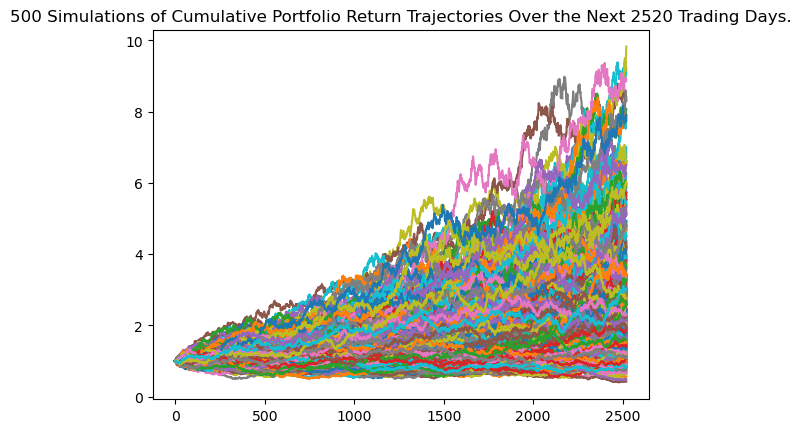

In [37]:
# Plot simulation outcomes
line_plot = MC_dist_portfolio_ten.plot_simulation()

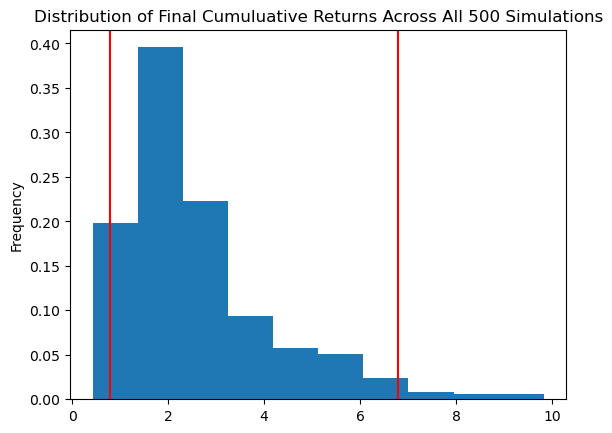

In [38]:
# Plot probability distribution and confidence intervals
dist_plot=MC_dist_portfolio_ten.plot_distribution()

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_portfolio_ten_stat = MC_dist_portfolio_ten.summarize_cumulative_return()

# Print summary statistics
print(summary_portfolio_ten_stat)

count           500.000000
mean              2.564387
std               1.491982
min               0.319350
25%               1.502490
50%               2.206172
75%               3.161363
max               9.844022
95% CI Lower      0.758181
95% CI Upper      6.897128
Name: 2520, dtype: float64


In [75]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_portfolio_ten_stat[8]*initial_investment,2)
ci_upper_ten = round(summary_portfolio_ten_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $45490.83 and $413827.69
